In [56]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#add the client id and client secret from our spotify api 
client_id = '253c1072397848feab42291a86e760ab'
client_secret = '06a6e93ddbc04588a596edeb071acf83'

#generate an access token to use  
def get_access_token(client_id, client_secret):
    auth_url = "https://accounts.spotify.com/api/token"
    auth_response = requests.post(auth_url, {
        'grant_type': 'client_credentials',
        'client_id': client_id,
        'client_secret': client_secret,
    })
    auth_response_data = auth_response.json()
    access_token = auth_response_data['access_token']
    return access_token

#use daily access token 
access_token = get_access_token(client_id, client_secret)
print("Access Token:", access_token)


Access Token: BQB9Eo0PWxItsoQC-CzoxYvXBEjKaUFPX2BG_1h8Dsf5INR0b2J1FVXNReeRpZ8lnYL-0fCrzhuYTF9CcLm4J1kPllp9RzaZwFh01i3MhiuhcuBCJvY


In [24]:
#assign each countries platlist ids (top 50 daily) - spotify api doesnt allow to pull playlist ids directly from the daily song charts page , had to pull it manually
#use this url https://open.spotify.com/genre/charts-regional
playlist_ids = {
 'Argentina': '37i9dQZEVXbMMy2roB9myp',
    'Australia': '37i9dQZEVXbJPcfkRz0wJ0',
    'Austria': '37i9dQZEVXbKNHh6NIXu36',
    'Belarus': '37i9dQZEVXbIYfjSLbWr4V',
    'Belgium': '37i9dQZEVXbJNSeeHswcKB',
    'Bolivia': '37i9dQZEVXbJqfMFK4d691',
    'Brazil' :'37i9dQZEVXbMXbN3EUUhlg',
    'Bulgaria': '37i9dQZEVXbNfM2w2mq1B8',
    'Canada': '37i9dQZEVXbKj23U1GF4IR',
    'Chile': '37i9dQZEVXbL0GavIqMTeb',
    'Colombia': '37i9dQZEVXbOa2lmxNORXQ',
    'Costa Rica': '37i9dQZEVXbMZAjGMynsQX',
    'Czech Republic': '37i9dQZEVXbIP3c3fqVrJY',
    'Denmark': '37i9dQZEVXbL3J0k32lWnN',
    'Dominican Republic': '37i9dQZEVXbKAbrMR8uuf7',
    'Ecuador': '37i9dQZEVXbJlM6nvL1nD1',
    'Egypt' : '37i9dQZEVXbLn7RQmT5Xv2',
    'El Salvador': '37i9dQZEVXbLxoIml4MYkT',
    'Estonia': '37i9dQZEVXbLesry2Qw2xS',
    'Finland': '37i9dQZEVXbMxcczTSoGwZ',
    'France': '37i9dQZEVXbIPWwFssbupI',
    'Germany': '37i9dQZEVXbJiZcmkrIHGU',
    'Greece': '37i9dQZEVXbJqdarpmTJDL',
    'Guatemala': '37i9dQZEVXbLy5tBFyQvd4',
    'Honduras': '37i9dQZEVXbJp9wcIM9Eo5',
    'Hong Kong': '37i9dQZEVXbLwpL8TjsxOG',
    'Hungary': '37i9dQZEVXbNHwMxAkvmF8',
    'Iceland': '37i9dQZEVXbKMzVsSGQ49S',
    'India': '37i9dQZEVXbLZ52XmnySJg',
    'Indonesia': '37i9dQZEVXbObFQZ3JLcXt',
    'Ireland': '37i9dQZEVXbKM896FDX8L1',
    'Israel': '37i9dQZEVXbJ6IpvItkve3',
    'Italy': '37i9dQZEVXbIQnj7RRhdSX',
    'Japan': '37i9dQZEVXbKXQ4mDTEBXq',
    'Kazakhstan': '37i9dQZEVXbM472oKPNKzS',
    'Latvia': '37i9dQZEVXbJWuzDrTxbKS',
    'Lithuania': '37i9dQZEVXbMx56Rdq5lwc',
    'Luxembourg': '37i9dQZEVXbKGcyg6TFGx6',
    'Malaysia': '37i9dQZEVXbJlfUljuZExa',
    'Mexico': '37i9dQZEVXbO3qyFxbkOE1',
    'Morocco': '37i9dQZEVXbJU9eQpX8gPT',
    'Netherlands': '37i9dQZEVXbKCF6dqVpDkS',
    'New Zealand': '37i9dQZEVXbM8SIrkERIYl',
    'Nicaragua': '37i9dQZEVXbISk8kxnzfCq',
    'Nigeria': '37i9dQZEVXbKY7jLzlJ11V',
    'Norway': '37i9dQZEVXbJvfa0Yxg7E7',
    'Pakistan': '37i9dQZEVXbJkgIdfsJyTw',
    'Panama': '37i9dQZEVXbKypXHVwk1f0',
    'Paraguay': '37i9dQZEVXbNOUPGj7tW6T',
    'Peru': '37i9dQZEVXbJfdy5b0KP7W',
    'Philippines': '37i9dQZEVXbNBz9cRCSFkY',
    'Poland': '37i9dQZEVXbN6itCcaL3Tt',
    'Portugal': '37i9dQZEVXbKyJS56d1pgi',
    'Romania': '37i9dQZEVXbNZbJ6TZelCq',
    'Saudi Arabia': '37i9dQZEVXbLrQBcXqUtaC',
    'Singapore': '37i9dQZEVXbK4gjvS1FjPY',
    'Slovakia': '37i9dQZEVXbKIVTPX9a2Sb',
    'South Africa': '37i9dQZEVXbMH2jvi6jvjk',
    'South Korea': '37i9dQZEVXbNxXF4SkHj9F',
    'Spain': '37i9dQZEVXbNFJfN1Vw8d9',
    'Sweden': '37i9dQZEVXbLoATJ81JYXz',
    'Switzerland': '37i9dQZEVXbJiyhoAPEfMK',
    'Taiwan': '37i9dQZEVXbMnZEatlMSiu',
    'Thailand': '37i9dQZEVXbIVYVBNw9D5K',
    'Turkey': '37i9dQZEVXbM4UZuIrvHvA',
    'UAE': '37i9dQZEVXbLRQDuF5jeBp',
    'USA': '37i9dQZEVXbKkidEfWYRuD',
    'Ukraine': '37i9dQZEVXbLnolsZ8PSNw',
    'United Kingdom': '37i9dQZEVXbMJJi3wgRbAy',
    'Uruguay': '37i9dQZEVXbNLrliB10ZnX',
    'Venezuela': '37i9dQZEVXbLdGSmz6xilI',
    'Vietnam': '37i9dQZEVXbIPWwFssbupI'
}




In [25]:
#create empty lists to show data 
countries = []
tracks = []
artists = []

for country, playlist_id in playlist_ids.items():
    url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
    headers = {"Authorization": f"Bearer {access_token}"}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        # Extract track information from the response JSON
        tracks_data = response.json()["items"]
        for track in tracks_data:
            # Extract the name of the track
            track_name = track["track"]["name"]
            
            # Extract the name(s) of the artist(s)
            artist_names = [artist["name"] for artist in track["track"]["artists"]]
            
            # Append the country name, track name, and artist name(s) to their respective lists
            countries.append(country)
            tracks.append(track_name)
            artists.append(artist_names)

#create a dataframe with the columns country, track and , artist
data = {
    'Country': countries,
    'Track': tracks,
    'Artist': artists
}

df = pd.DataFrame(data)
#show dataframe
df

,Country,Track,Artist
0,Argentina,Gata Only,"[FloyyMenor, Cris Mj]"
1,Argentina,Piel,"[Tiago PZK, Ke Personajes]"
2,Argentina,30 GRADOS,"[El Turko, Mandale Flow]"
3,Argentina,Tal Para Cual,"[Salastkbron, Omar Varela]"
4,Argentina,Un Besito Más,"[Salastkbron, Diel Paris]"
...,...,...,...
3595,Vietnam,Gimme Love,[Sia]
3596,Vietnam,Popcorn Salé,[SANTA]
3597,Vietnam,Loca Loca,"[R3HAB, Pelican]"
3598,Vietnam,Mauvaise,[Werenoi]


In [29]:
#test for different country to show top 10 
top10 = df[df['Country'] == 'Australia'].head(10)
top10

,Country,Track,Artist
50,Australia,Too Sweet,[Hozier]
51,Australia,Beautiful Things,[Benson Boone]
52,Australia,i like the way you kiss me,[Artemas]
53,Australia,Stick Season,[Noah Kahan]
54,Australia,End of Beginning,[Djo]
55,Australia,Lose Control,[Teddy Swims]
56,Australia,Cruel Summer,[Taylor Swift]
57,Australia,we can't be friends (wait for your love),[Ariana Grande]
58,Australia,greedy,[Tate McRae]
59,Australia,TEXAS HOLD 'EM,[Beyoncé]


In [7]:
#check columns because of merge error
df.columns

Index(['Country', 'Track', 'Artist'], dtype='object')

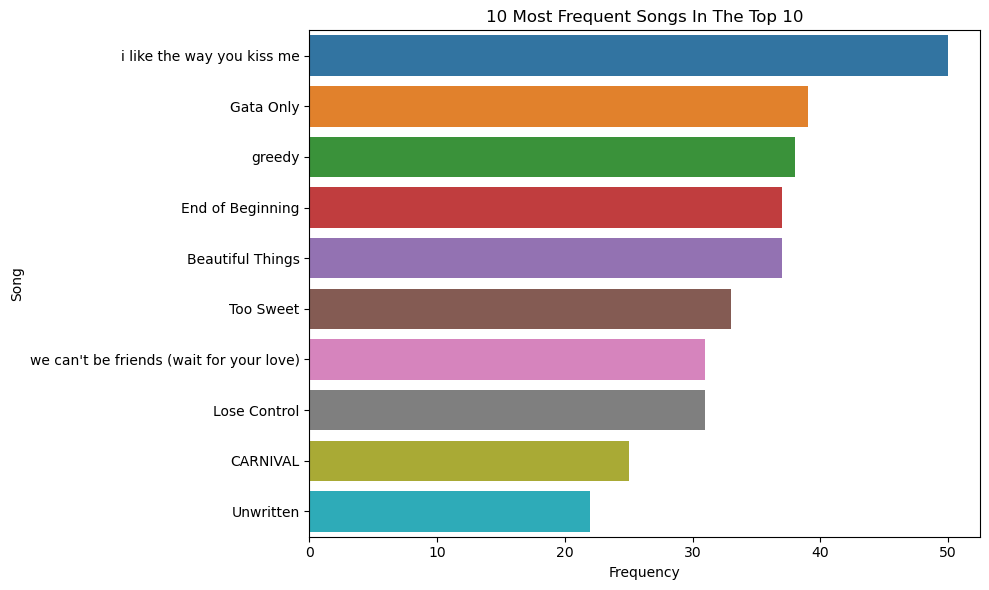

Song: i like the way you kiss me
Countries: Australia, Austria, Belgium, Bolivia, Bulgaria, Canada, Colombia, Costa Rica, Czech Republic, Denmark, Ecuador, El Salvador, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Israel, Italy, Kazakhstan, Latvia, Lithuania, Luxembourg, Malaysia, Mexico, Morocco, Netherlands, New Zealand, Norway, Panama, Peru, Poland, Portugal, Romania, Saudi Arabia, Singapore, Slovakia, South Africa, Spain, Sweden, Switzerland, Thailand, Turkey, UAE, USA, Ukraine, Vietnam
Artists: Artemas

Song: Gata Only
Countries: Argentina, Austria, Belgium, Bolivia, Bulgaria, Canada, Chile, Colombia, Costa Rica, Dominican Republic, Ecuador, El Salvador, Estonia, France, Germany, Guatemala, Honduras, Hungary, Italy, Latvia, Lithuania, Luxembourg, Mexico, Morocco, Netherlands, Nicaragua, Panama, Paraguay, Peru, Portugal, Romania, Slovakia, Spain, Switzerland, Turkey, UAE, United Kingdom, Uruguay, Vietnam
Artists: FloyyMenor, Cris Mj

Song: greedy
Countries:

In [8]:
# Visualisation 1 the top 10 most frequent songs  from df
plt.figure(figsize=(10, 6))
top_songs = df['Track'].value_counts().head(10)
sns.barplot(x=top_songs.values, y=top_songs.index)
plt.title('10 Most Frequent Songs In The Top 10')
plt.xlabel('Frequency') 
plt.ylabel('Song')
plt.tight_layout()
plt.show()

#iterate over the most popular songs and print out the countries that have them
for song in top_songs.index:
    print(f"Song: {song}")
    song_df = df[df['Track'] == song]
    artists = song_df['Artist'].explode().unique()
    countries = song_df['Country'].unique()

#print out the countries and artists that have one of the top 10  
    print(f"Countries: {', '.join(countries)}")
    print(f"Artists: {', '.join(artists)}\n")



In [12]:
#visualisation 1.2 (using the 10 most frequent songs in each country analyse each of their tempo and dancibility using a scatter plot)
#use spotify api to search for the song ids

def search_tracks(songs, access_token):
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    track_ids = []
    for song in songs:
        query = f'{song["track"]} {song["artist"]}'
        params = {
            'q': query,
            'type': 'track',
            'limit': 1  
        }
        url = 'https://api.spotify.com/v1/search'
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            if data['tracks']['items']:
                track_id = data['tracks']['items'][0]['id']
                track_ids.append(track_id)
            
    return track_ids

#enter the top 10 songs 
songs = [
    {'track': 'i like the way you kiss me', 'artist': 'Artemas'},
    {'track': 'Beautiful Things', 'artist': 'Benson Boone'},
    {'track': 'End of Beginning', 'artist': 'Djo'},
    {'track': 'greedy', 'artist': 'Tate McRae'},
    {'track': 'Gata Only', 'artist': 'FloyyMenor, Cris Mj'},
    {'track': 'Too Sweet', 'artist': 'Hozier'},
    {'track': 'we can\'t be friends (wait for your love)', 'artist': 'Ariana Grande'},
    {'track': 'Lose Control', 'artist': 'Teddy Swims'},
    {'track': 'Illusion', 'artist': 'Dua Lipa'},
    {'track': 'CARNIVAL', 'artist': '¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti'}
]


access_token = 'BQAKAZ7KZw9LKlCzk52CIafru8sZAv3z3AvmvZEiY0sGJSy7XdTB8AohciSXm2StVhtfSYB0HGkupoo1lfRcLwLnW6V9kzkSRxxmwDpp8nZlUaG9fR0'
track_ids = search_tracks(songs, access_token)
print(f'Track IDs: {track_ids}')




Track IDs: ['2GxrNKugF82CnoRFbQfzPf', '6tNQ70jh4OwmPGpYy6R2o9', '3qhlB30KknSejmIvZZLjOD', '3rUGC1vUpkDG9CZFHMur1t', '6XjDF6nds4DE2BBbagZol6', '4IadxL6BUymXlh8RCJJu7T', '46kspZSY3aKmwQe7O77fCC', '6usohdchdzW9oML7VC4Uhk', '59xD5osEFsaNt5PXfIKUnX', '3w0w2T288dec0mgeZZqoNN']


In [13]:
#visualisation 1 (print out the each tracks audio features)
import pprint

def get_audio_features(track_ids, access_token):
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    # Flatten the list of lists
    flat_track_ids = [track_id for sublist in track_ids for track_id in sublist]
    params = {
        'ids': ','.join(flat_track_ids)
    }
    url = 'https://api.spotify.com/v1/audio-features'
    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:
        return response.json()['audio_features']
    else:
        return None

#copy track ids
track_ids = [['2GxrNKugF82CnoRFbQfzPf', '6tNQ70jh4OwmPGpYy6R2o9', '3qhlB30KknSejmIvZZLjOD', '3rUGC1vUpkDG9CZFHMur1t', '6XjDF6nds4DE2BBbagZol6', '4IadxL6BUymXlh8RCJJu7T', '46kspZSY3aKmwQe7O77fCC', '6usohdchdzW9oML7VC4Uhk', '59xD5osEFsaNt5PXfIKUnX', '3w0w2T288dec0mgeZZqoNN']]
access_token = 'BQAKAZ7KZw9LKlCzk52CIafru8sZAv3z3AvmvZEiY0sGJSy7XdTB8AohciSXm2StVhtfSYB0HGkupoo1lfRcLwLnW6V9kzkSRxxmwDpp8nZlUaG9fR0'
audio_features = get_audio_features(track_ids, access_token)
pprint.pprint(audio_features)





[{'acousticness': 0.000938,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2GxrNKugF82CnoRFbQfzPf',
  'danceability': 0.599,
  'duration_ms': 142515,
  'energy': 0.946,
  'id': '2GxrNKugF82CnoRFbQfzPf',
  'instrumentalness': 0.0106,
  'key': 11,
  'liveness': 0.0826,
  'loudness': -4.263,
  'mode': 1,
  'speechiness': 0.0447,
  'tempo': 151.647,
  'time_signature': 4,
  'track_href': 'https://api.spotify.com/v1/tracks/2GxrNKugF82CnoRFbQfzPf',
  'type': 'audio_features',
  'uri': 'spotify:track:2GxrNKugF82CnoRFbQfzPf',
  'valence': 0.747},
 {'acousticness': 0.151,
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6tNQ70jh4OwmPGpYy6R2o9',
  'danceability': 0.472,
  'duration_ms': 180304,
  'energy': 0.471,
  'id': '6tNQ70jh4OwmPGpYy6R2o9',
  'instrumentalness': 0,
  'key': 10,
  'liveness': 0.14,
  'loudness': -5.692,
  'mode': 1,
  'speechiness': 0.0603,
  'tempo': 105.029,
  'time_signature': 3,
  'track_href': 'https://api.spotify.com/v1/tracks/6tNQ70jh4OwmPGp

In [14]:
df = pd.DataFrame(audio_features)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.599,0.946,11,-4.263,1,0.0447,0.000938,0.010600,0.0826,0.747,151.647,audio_features,2GxrNKugF82CnoRFbQfzPf,spotify:track:2GxrNKugF82CnoRFbQfzPf,https://api.spotify.com/v1/tracks/2GxrNKugF82C...,https://api.spotify.com/v1/audio-analysis/2Gxr...,142515,4
1,0.472,0.471,10,-5.692,1,0.0603,0.151000,0.000000,0.1400,0.219,105.029,audio_features,6tNQ70jh4OwmPGpYy6R2o9,spotify:track:6tNQ70jh4OwmPGpYy6R2o9,https://api.spotify.com/v1/tracks/6tNQ70jh4Owm...,https://api.spotify.com/v1/audio-analysis/6tNQ...,180304,3
2,0.689,0.454,2,-7.643,1,0.0584,0.035100,0.002590,0.0707,0.912,159.982,audio_features,3qhlB30KknSejmIvZZLjOD,spotify:track:3qhlB30KknSejmIvZZLjOD,https://api.spotify.com/v1/tracks/3qhlB30KknSe...,https://api.spotify.com/v1/audio-analysis/3qhl...,159246,4
3,0.750,0.733,6,-3.180,0,0.0319,0.256000,0.000000,0.1140,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1
4,0.791,0.499,8,-8.472,0,0.0509,0.446000,0.000024,0.0899,0.669,99.986,audio_features,6XjDF6nds4DE2BBbagZol6,spotify:track:6XjDF6nds4DE2BBbagZol6,https://api.spotify.com/v1/tracks/6XjDF6nds4DE...,https://api.spotify.com/v1/audio-analysis/6XjD...,222000,4
5,0.741,0.620,10,-5.505,1,0.0412,0.029500,0.000809,0.0398,0.934,117.038,audio_features,4IadxL6BUymXlh8RCJJu7T,spotify:track:4IadxL6BUymXlh8RCJJu7T,https://api.spotify.com/v1/tracks/4IadxL6BUymX...,https://api.spotify.com/v1/audio-analysis/4Iad...,251424,4
6,0.647,0.650,5,-8.278,1,0.0421,0.071600,0.000016,0.0749,0.281,115.853,audio_features,46kspZSY3aKmwQe7O77fCC,spotify:track:46kspZSY3aKmwQe7O77fCC,https://api.spotify.com/v1/tracks/46kspZSY3aKm...,https://api.spotify.com/v1/audio-analysis/46ks...,228639,4
7,0.561,0.604,9,-4.409,1,0.0337,0.199000,0.000019,0.1040,0.242,159.920,audio_features,6usohdchdzW9oML7VC4Uhk,spotify:track:6usohdchdzW9oML7VC4Uhk,https://api.spotify.com/v1/tracks/6usohdchdzW9...,https://api.spotify.com/v1/audio-analysis/6uso...,210689,3
8,0.679,0.772,8,-4.721,0,0.0472,0.027700,0.000003,0.1060,0.709,126.964,audio_features,59xD5osEFsaNt5PXfIKUnX,spotify:track:59xD5osEFsaNt5PXfIKUnX,https://api.spotify.com/v1/tracks/59xD5osEFsaN...,https://api.spotify.com/v1/audio-analysis/59xD...,188143,4
9,0.594,0.811,1,-5.746,1,0.1590,0.189000,0.000000,0.3390,0.311,148.144,audio_features,3w0w2T288dec0mgeZZqoNN,spotify:track:3w0w2T288dec0mgeZZqoNN,https://api.spotify.com/v1/tracks/3w0w2T288dec...,https://api.spotify.com/v1/audio-analysis/3w0w...,264324,4


Tempo: 151.647 BPM
Danceability: 0.599

Tempo: 105.029 BPM
Danceability: 0.472

Tempo: 159.982 BPM
Danceability: 0.689

Tempo: 111.018 BPM
Danceability: 0.75

Tempo: 99.986 BPM
Danceability: 0.791

Tempo: 117.038 BPM
Danceability: 0.741

Tempo: 115.853 BPM
Danceability: 0.647

Tempo: 159.92 BPM
Danceability: 0.561

Tempo: 126.964 BPM
Danceability: 0.679

Tempo: 148.144 BPM
Danceability: 0.594



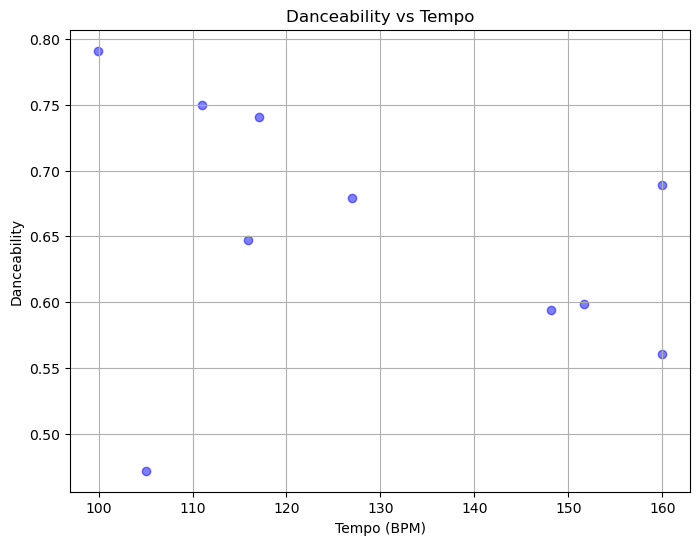

In [15]:
#visualisation 1 (print out the each tracks audio features)
audio_features = [af for af in audio_features if af is not None]
tempos = [af['tempo'] for af in audio_features]
danceabilities = [af['danceability'] for af in audio_features]


#Print output
for af in audio_features:
    print(f"Tempo: {af.get('tempo', 'N/A')} BPM")
    print(f"Danceability: {af.get('danceability', 'N/A')}\n")

#create our scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tempos, danceabilities, color='blue', alpha=0.5)
plt.title('Danceability vs Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Danceability')
plt.grid(True) # Add a grid to make it easier to identify
plt.show()



In [96]:
#add into a dataframe to identify each song from its tempo and dancibility better
songs = [
    {'track': 'i like the way you kiss me', 'artist': 'Artemas'},
    {'track': 'Beautiful Things', 'artist': 'Benson Boone'},
    {'track': 'End of Beginning', 'artist': 'Djo'},
    {'track': 'greedy', 'artist': 'Tate McRae'},
    {'track': 'Gata Only', 'artist': 'FloyyMenor, Cris Mj'},
    {'track': 'Too Sweet', 'artist': 'Hozier'},
    {'track': "we can't be friends (wait for your love)", 'artist': 'Ariana Grande'},
    {'track': 'Lose Control', 'artist': 'Teddy Swims'},
    {'track': 'Illusion', 'artist': 'Dua Lipa'},
    {'track': 'CARNIVAL', 'artist': '¥$, Kanye West, Ty Dolla $ign, Rich The Kid, Playboi Carti'}
]

#use the printed tempo s and dancibilities 
tempos = [151.647, 105.029, 159.982, 111.018, 99.986, 117.038, 115.853, 159.92, 126.964, 148.144]
danceabilities = [0.599, 0.472, 0.689, 0.75, 0.791, 0.741, 0.647, 0.561, 0.679, 0.594]

temp_df = pd.DataFrame({'Track': [song['track'] for song in songs],
                   'Artist': [song['artist'] for song in songs],
                   'Tempo': tempos,
                   'Danceability': danceabilities})
temp_df


,Track,Artist,Tempo,Danceability
0,i like the way you kiss me,Artemas,151.647,0.599
1,Beautiful Things,Benson Boone,105.029,0.472
2,End of Beginning,Djo,159.982,0.689
3,greedy,Tate McRae,111.018,0.750
4,Gata Only,"FloyyMenor, Cris Mj",99.986,0.791
5,Too Sweet,Hozier,117.038,0.741
6,we can't be friends (wait for your love),Ariana Grande,115.853,0.647
7,Lose Control,Teddy Swims,159.920,0.561
8,Illusion,Dua Lipa,126.964,0.679
9,CARNIVAL,"¥$, Kanye West, Ty Dolla $ign, Rich The Kid, P...",148.144,0.594


KeyError: "None of [Index(['Tempo', 'Danceability'], dtype='object')] are in the [columns]"

In [44]:
#Visualisation 2 analyse the energy levels from 4 different countries (boxplot) 
#use code from earlier to check the top 10 songs in each country
top10 = df[df['Country'] == 'Peru'].head(10)
top10

,Country,Track,Artist
2450,Peru,Gata Only,"[FloyyMenor, Cris Mj]"
2451,Peru,LUNA,"[Feid, ATL Jacob]"
2452,Peru,AMARGURA,[KAROL G]
2453,Peru,LA FALDA,[Myke Towers]
2454,Peru,QLONA,"[KAROL G, Peso Pluma]"
2455,Peru,Una Foto Remix (feat. Emilia),"[Mesita, Nicki Nicole, Tiago PZK, Emilia]"
2456,Peru,PERRO NEGRO,"[Bad Bunny, Feid]"
2457,Peru,MI EX TENÍA RAZÓN,[KAROL G]
2458,Peru,Piel,"[Tiago PZK, Ke Personajes]"
2459,Peru,La Bachata,[Manuel Turizo]


In [82]:
#Visualisation 2 analyse the energy levels from 4 different countries (boxplot) 
#use api to get top 10 from the created dataframe 
def search_tracks(songs, access_token, country, collected_ids):
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    track_ids = []
    for song in songs:
        query = f'{song["track"]} {song["artist"]} {country}'  
        params = {
            'q': query,
            'type': 'track',
            'limit': 1  
        }
        url = 'https://api.spotify.com/v1/search'
        response = requests.get(url, headers=headers, params=params)
        if response.status_code == 200:
            data = response.json()
            if data['tracks']['items']:
                track_id = data['tracks']['items'][0]['id']
                if track_id not in collected_ids[country]:  # Check if track ID is not already collected for this country
                    track_ids.append({'track_id': track_id, 'country': country})
                    collected_ids[country].add(track_id)  # Add track ID to set of collected IDs for this country
            
    return track_ids

#store the colled ids for each country use set function 
collected_ids = {'Australia': set(), 'United Kingdom': set(), 'Malaysia': set(), 'Portugal': set()}

#retrieve the track ids from each song and pretty print for better readability
track_ids_aus = search_tracks(songs[:10], access_token, 'Australia', collected_ids)
print(f'Track IDs (Australia):')
pprint.pprint(track_ids_aus)

track_ids_uk = search_tracks(songs[10:20], access_token, 'United Kingdom', collected_ids)
print(f'Track IDs (United Kingdom):')
pprint.pprint(track_ids_uk)

track_ids_mal = search_tracks(songs[20:30], access_token, 'Malaysia', collected_ids)
print(f'Track IDs (Malaysia):')
pprint.pprint(track_ids_mal)

track_ids_por = search_tracks(songs[30:], access_token, 'Portugal', collected_ids)
print(f'Track IDs (Portugal):')
pprint.pprint(track_ids_por)


Track IDs (Australia):
[{'country': 'Australia', 'track_id': '0AjmK0Eai4zGrLaJwPvrDp'},
 {'country': 'Australia', 'track_id': '6tNQ70jh4OwmPGpYy6R2o9'},
 {'country': 'Australia', 'track_id': '2GxrNKugF82CnoRFbQfzPf'},
 {'country': 'Australia', 'track_id': '0caJ2wkqp4UmXBwdR2JvB5'},
 {'country': 'Australia', 'track_id': '3qhlB30KknSejmIvZZLjOD'},
 {'country': 'Australia', 'track_id': '17phhZDn6oGtzMe56NuWvj'},
 {'country': 'Australia', 'track_id': '6ClYMObS7f3Nn4AiZHYQt3'},
 {'country': 'Australia', 'track_id': '51ZQ1vr10ffzbwIjDCwqm4'},
 {'country': 'Australia', 'track_id': '3rUGC1vUpkDG9CZFHMur1t'},
 {'country': 'Australia', 'track_id': '0Z7nGFVCLfixWctgePsRk9'}]
Track IDs (United Kingdom):
[{'country': 'United Kingdom', 'track_id': '6XjDF6nds4DE2BBbagZol6'},
 {'country': 'United Kingdom', 'track_id': '5rQSQlZXXjMcevPGoAfE1z'},
 {'country': 'United Kingdom', 'track_id': '4wS0TnQzVkY9ML1BPKpOk1'},
 {'country': 'United Kingdom', 'track_id': '0mflMxspEfB0VbI1kyLiAv'},
 {'country': 'Unite

In [85]:
#Visualisation 2 analyse the energy levels from 4 different countries (boxplot) 
def get_audio_features(track_id, access_token):
    headers = {
        'Authorization': f'Bearer {access_token}'
    }
    url = f'https://api.spotify.com/v1/audio-features/{track_id}'
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return None

#get the audio features (specifically energy) for each track ID
audio_features_aus = [get_audio_features(track['track_id'], access_token) for track in track_ids_aus]
audio_features_uk = [get_audio_features(track['track_id'], access_token) for track in track_ids_uk]
audio_features_mal = [get_audio_features(track['track_id'], access_token) for track in track_ids_mal]
audio_features_por = [get_audio_features(track['track_id'], access_token) for track in track_ids_por]

#extract the energy values from the audio features (fror)
energy_aus = [track['energy'] for track in audio_features_aus if track is not None]
energy_uk = [track['energy'] for track in audio_features_uk if track is not None]
energy_mal = [track['energy'] for track in audio_features_mal if track is not None]
energy_por = [track['energy'] for track in audio_features_por if track is not None]

#print all the energy values
print("Energy for Australia:")
pprint.pprint(energy_aus)
print("\nEnergy for United Kingdom:")
pprint.pprint(energy_uk)
print("\nEnergy for Malaysia:")
pprint.pprint(energy_mal)
print("\nEnergy for Portugal:")
pprint.pprint(energy_por)



Energy for Australia:
[0.62, 0.471, 0.946, 0.595, 0.454, 0.604, 0.907, 0.663, 0.733, 0.709]

Energy for United Kingdom:
[0.499, 0.641, 0.907, 0.488, 0.555, 0.471, 0.812, 0.703, 0.271, 0.597]

Energy for Malaysia:
[0.668, 0.663, 0.493, 0.454, 0.626, 0.558, 0.359, 0.718, 0.641, 0.619]

Energy for Portugal:
[0.499, 0.86, 0.696, 0.738, 0.741, 0.703, 0.778, 0.725, 0.907, 0.679]


In [87]:
#plot into dataframe
df_energy = pd.DataFrame({
    'Australia': energy_aus,
    'United Kingdom': energy_uk,
    'Malaysia': energy_mal,
    'Portugal': energy_por
})

# Display the DataFrame
df_energy

,Australia,United Kingdom,Malaysia,Portugal
0,0.620,0.499,0.668,0.499
1,0.471,0.641,0.663,0.860
2,0.946,0.907,0.493,0.696
3,0.595,0.488,0.454,0.738
4,0.454,0.555,0.626,0.741
5,0.604,0.471,0.558,0.703
6,0.907,0.812,0.359,0.778
7,0.663,0.703,0.718,0.725
8,0.733,0.271,0.641,0.907
9,0.709,0.597,0.619,0.679


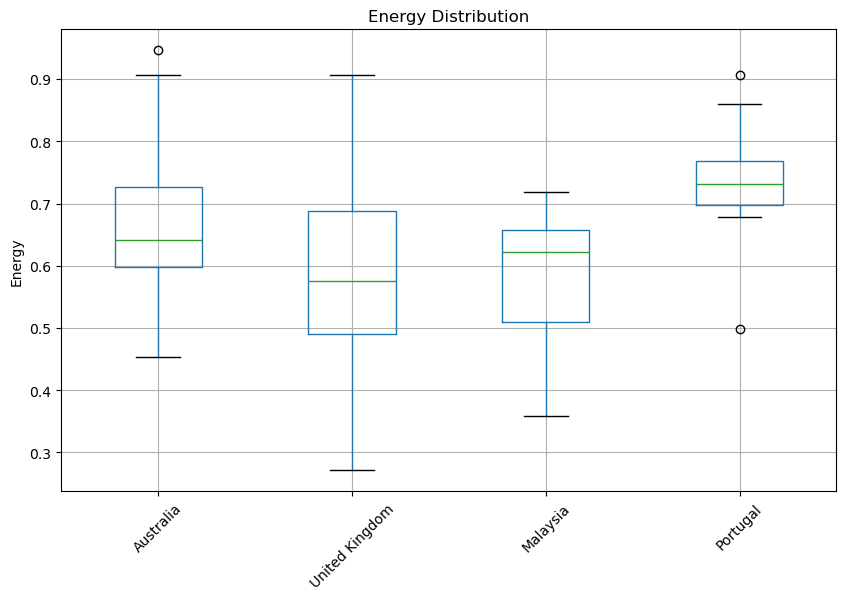

In [89]:
#FinAL VISUALISATION analyse the energy levels from 4 different countries (boxplot) )
df_energy.boxplot(figsize=(10, 6))
plt.title('Energy Distribution')
plt.ylabel('Energy')
plt.xticks(rotation=45)
plt.show()

In [92]:
#stat overview (correlation) comparing Australias energy with the other countries 
correlation_aus_uk = df_energy['Australia'].corr(df_energy['United Kingdom'])
correlation_aus_mal = df_energy['Australia'].corr(df_energy['Malaysia'])
correlation_aus_por = df_energy['Australia'].corr(df_energy['Portugal'])

print(f'Correlation between Australia and United Kingdom: {correlation_aus_uk}')
print(f'Correlation between Australia and Malaysia: {correlation_aus_mal}')
print(f'Correlation between Australia and Portugal: {correlation_aus_por}')


Correlation between Australia and United Kingdom: 0.5132927182489112
Correlation between Australia and Malaysia: -0.5602802681796621
Correlation between Australia and Portugal: -0.027022222615617063
